# Student Loan Risk with Deep Learning:



In [51]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [52]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [53]:
# Review the data types associated with the columns
display(loans_df.dtypes)

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [54]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [55]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
display(y[:5])

,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [56]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
display(X.head())

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Plot after re-sizing: 


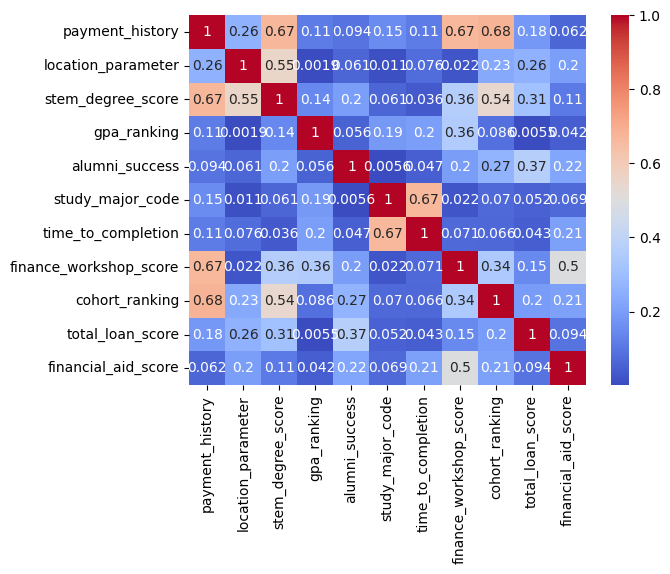

<Figure size 2000x4000 with 0 Axes>

[]

In [57]:
#########################################
# SANDBOX: NOT USED...investigating features.
#########################################

#reduced.
#  Look for highly Correlated Data and Remove
# ---------------------------------------------------

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)

print("Plot after re-sizing: ")
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(high_corr)

# df.drop(columns=to_drop, inplace=True)

,Feature,Importance
0,financial_aid_score,0.185601
1,total_loan_score,0.125932
2,location_parameter,0.111556
3,time_to_completion,0.097154
4,finance_workshop_score,0.091141
5,alumni_success,0.071305
6,cohort_ranking,0.068543
7,payment_history,0.065380
8,stem_degree_score,0.065137
9,study_major_code,0.060242


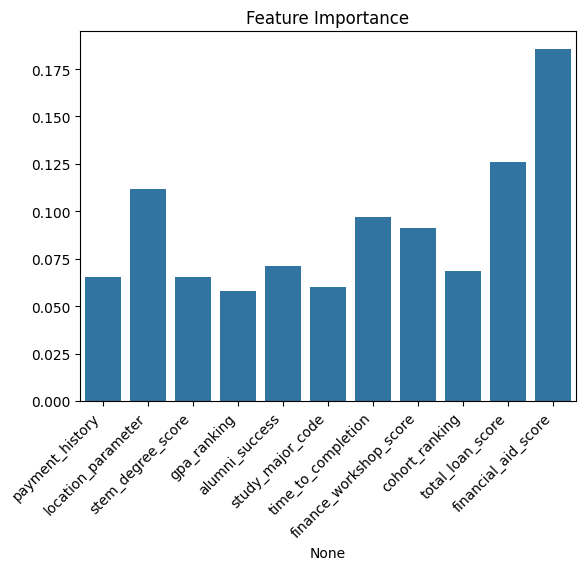

None

In [67]:
#########################################
# SANDBOX: NOT USED...investigating features.
#########################################

#reduced.
# Check Feature Importance:
# ---------------------------------------------------

# Train RandomForest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.reset_index(inplace=True, drop=True)
display(feature_importances)

# Drop features with low importance
threshold = 0.1
to_drop = feature_importances[feature_importances['Importance'] < threshold]['Feature']

# display(to_drop)


# # bar chart using the Seaborn library to show importance:
import seaborn as sns
sns.barplot(x=feature_names, y=importances).set_title("Feature Importance")
# Rotate the x-axis labels
plt.xticks(rotation=45 , horizontalalignment='right')
display(plt.show())

# # increase font size
# ax = sns.barplot(x=solver_list, y=scores)
# ax.set_title("Accuracy with Unscaled Features", fontsize = 20)

### Step 3: Split the features and target sets into training and testing datasets.


In [68]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [69]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit/train the scaler to the features training dataset
scaler.fit(X_train)

# Scale the X train and X test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# overfit??  training score of 1.0
# Spot check with Random Forest model:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1,
				n_estimators=500).fit(X_train_scaled, y_train)
# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.805


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [71]:
# Define the the number of inputs (features) to the model
feature_count = len(X.columns)
display(X.columns)

# Review the number of features
print("number of features: " , feature_count)

Index(['payment_history', 'location_parameter', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score', 'financial_aid_score'],
      dtype='object')

number of features:  11


In [72]:
#perform
import tensorflow as tf

# Define the model: # neurons/hidden nodes for hidden layers/output layer
hidden_nodes_layer_1 = 32 #perform up from 10
hidden_nodes_layer_2 = 16 #perform up from 5
neurons_output_layer = 1

# Create the Keras Sequential model instance
nn_model = Sequential()
# Add the first Dense (w/ input layer), second Dense/hidden, and ouput layer
nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim = feature_count))
nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# wab/2024.09.15 Originally tried 10/5 neurons, switched to 32/16

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# Display the Sequential model summary/Check the structure of the model
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [74]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
# Fit/Train the model using 50, 100, 200 epochs (intially) and the training data

# The epoch runs are all Training...see these accuracy values for overfit tendencies
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200) #perform, validation_split=0.2


Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4891 - loss: 0.7406
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - loss: 0.6293
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7192 - loss: 0.5812
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7453 - loss: 0.5391
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7498 - loss: 0.5302
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7557 - loss: 0.5182
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.5076
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.4958
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.4881
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7540 - loss: 0.4868
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7792 - loss: 0.4773
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [76]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 14ms/step - accuracy: 0.7600 - loss: 0.6178
Loss: 0.6177812814712524, Accuracy: 0.7599999904632568


In [77]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)
# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Inspect history df
display(history_df.head())

,accuracy,loss
1,0.531276,0.703411
2,0.665555,0.619868
3,0.730609,0.571697
4,0.746455,0.542428
5,0.749792,0.525365


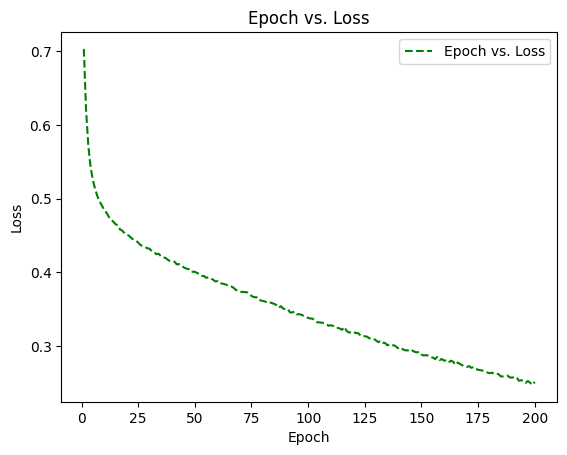

In [78]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_df.index, history_df['loss'], label='Epoch vs. Loss', color='g', linestyle='--')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# simple dataframe plot:
# history_df.plot(y="loss")

Text(0.5, 0, 'Epoch')

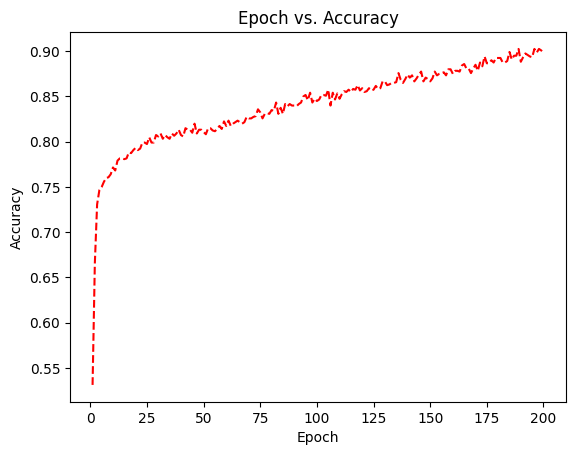

In [79]:
# Plot the accuracy
plt.plot(history_df.index, history_df['accuracy'], label='Epoch vs. Accuracy', color='r', linestyle='--')
plt.title('Epoch vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# simple dataframe plot:
# history_df.plot(y="accuracy")

In [80]:
# RE-Fit/Train the model using 25 epochs (intially) and the training data

# The epoch runs are all Training...see these accuracy values for overfit tendencies
nn_model.fit(X_train_scaled, y_train, epochs=25) #perform, validation_split=0.2

#perform
# wab/2024.09.15 originally tried 50, then 100, 200 epochs; determined from Graph that 25 was more optimal.

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9095 - loss: 0.2342
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9105 - loss: 0.2505
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9070 - loss: 0.2483
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.2520
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8871 - loss: 0.2484
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8940 - loss: 0.2625
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.2504
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9012 - loss: 0.2459
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9002 - loss: 0.2419
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 0.2510
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.2369
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - lo

In [87]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 3ms/step - accuracy: 0.7825 - loss: 0.6604
Loss: 0.6604177951812744, Accuracy: 0.7825000286102295


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [81]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')#  , force_remount=True

# List the contents of My Drive
print(os.listdir('/content/drive/My Drive/saved_models'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


In [82]:
from pathlib import Path
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_perf.keras')

# Export your model to a keras file
nn_model.save(file_path)
print(os.listdir('/content/drive/My Drive/saved_models'))

['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [83]:
# Import the required libraries
import tensorflow as tf

print(os.listdir('/content/drive/My Drive/saved_models'))
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_perf.keras')

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [84]:
# Make predictions with the test data
# predictions = nn_model.predict(X_test,verbose=2)
predictions = nn_imported.predict(X_test_scaled, verbose=2)

# Display a sample of the predictions
predictions[:10]

13/13 - 0s - 8ms/step


array([[0.9885834 ],
       [0.40018532],
       [0.34567636],
       [0.8448686 ],
       [0.84932137],
       [0.49678203],
       [0.3903873 ],
       [0.9995728 ],
       [0.01500025],
       [0.09685146]], dtype=float32)

In [85]:
# Save the predictions to a DataFrame and round the predictions to binary results
df_preds = pd.DataFrame(predictions, columns=['Prediction']) #convert numpy array to DataFrame.
df_preds_binary = df_preds.applymap(lambda x: 1 if x > 0.5 else 0)

display(df_preds_binary.value_counts())
display(df_preds_binary.head())
display(df_preds_binary.tail())

<ipython-input-85-bcfd8d9954d7>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_preds_binary = df_preds.applymap(lambda x: 1 if x > 0.5 else 0)


,count
Prediction,
1,225
0,175


,Prediction
0,1
1,0
2,0
3,1
4,1


,Prediction
395,0
396,1
397,0
398,1
399,1


### Step 4: Display a classification report with the y test data and predictions

In [86]:
# Print the classification report with the y test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, df_preds_binary))

              precision    recall  f1-score   support

           0       0.81      0.73      0.76       194
           1       0.76      0.83      0.80       206

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



In [ ]:
# #############################################################
#  --> Description of 'perform' model----------------------------
# student_loans_with_deep_learning_performance.ipynb
# added performance improvements: tag: #perform
#   -increased neuons of 1st/2nd hidden layers to 32/16 from 10/5
#   -reduced Epochs to 25, which appeared to be plateau for Accuracy/Loss

#  --> Evaluation of 'perform' model----------------------------

# The model performs well with overall accuracy of 78%.
# Model performs similarly for both classes, with slightly better recall for class 1.
# Model is well-balanced and performs consistently across both classes.


# Training accuracy was 0.9220 (model correctly predicts the training data
# with an accuracy of 92.20%), as seen in output in final Epoch of the Train/Fit
# of the model:
# Epoch 100/100
# 38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3418

# NOTE: class 0 : bad credit risk; class 1: good credit risk

# Well balanced (support):
#  194 instances of Class 0
#  206 instances of Class 1

#  --> Details ------------------------------------------------
# Precision (predicted true results were actually true)
    # Class 0: 81% of the instances predicted as class 0 are actually class 0.
    # Class 1: 76%

# Recall/Sensitivity (actually true data points were identified correctly):
    # Class 0: model correctly identifies 73% of the actual class 1 instances
    # Class 1: model correctly identifies 83% of the actual class 1 instances

# F1-Score:
# balances sensitivity/recall and precision; harmonic mean of precision and recall
    # class 0: 0.76
    # class 1: 0.80

#  --> Data ------------------------------------------------
# 13/13 - 0s - 3ms/step - accuracy: 0.7825 - loss: 0.6604
# Loss: 0.6604177951812744, Accuracy: 0.7825000286102295

#               precision    recall  f1-score   support

#            0       0.81      0.73      0.76       194
#            1       0.76      0.83      0.80       206

#     accuracy                           0.78       400
#    macro avg       0.79      0.78      0.78       400
# weighted avg       0.78      0.78      0.78       400


# #############################################################
# NOTES: reading Accuracy scores
    # Accuracy:  all the things you got right over everything
    # Sensitivity/Recall: how many actually true data points were identified correctly.
    # Specificity: how many actually false data points were identified correctly
    # Precision: how many predicted true results were actually true
    # F1 score balances sensitivity/recall and precision

        # Here are the features considered:
    #       'payment_history', 'location_parameter', 'stem_degree_score',
    #       'gpa_ranking', 'alumni_success', 'study_major_code', 'time_to_completion',
    #       'finance_workshop_score', 'cohort_ranking', 'total_loan_score', 'financial_aid_score'

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:


1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

The features used in this model include:
'payment_history', 'location_parameter', 'stem_degree_score',
'gpa_ranking', 'alumni_success', 'study_major_code', 'time_to_completion',
'finance_workshop_score', 'cohort_ranking', 'total_loan_score', 'financial_aid_score'

So, from each candidate/student, would need their history of payments (of other loans), their address/location, their grades, ranking, major, time to complete their major, scores from the finance workshop, ranking in their cohort, financial aid scores (from the university?) and total loan score for any other loans taken.


2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.


Content-based filtering leverages the attributes of each candidate to make recommendations.  We have this data: grades, major, financial score.

Context-based filtering considers the context in which the recommendation is made.  We have data such as location and history of payments.

Collaborative filtering is based on user interactions or preferences; we don't have that data available.

Our recommendation model would be a hybrid of content and context-based filtering.  Content-based can help build a profile; context-based filtering- can be used to customize recommendations based on the user's context.


3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

1) Most of this data is highly sensitive: financial, grades, location, etc.  Use of the data would require consent and would have to be handled/maintained  carefully.
2) Financial aid applications might contain information about race/gender, which would be sensitive information to use to determine if a loan will be granted.  Using attribues like race/gender, and even major and financial aid might insert biases into the recommendation engine.






**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



In [ ]:
# NOTES for README:

# Create a deep neural network using Tensorflow's Keras model to predict student loan repayment
# CSV file contains information about previous student loan recipients

#   * Prepare the data for use on a neural network model.
#   * Compile and evaluate a model using a neural network.
#   * Predict loan repayment success with the neural network model
#   * Discuss recommendation system for student loans

# Prepare the data, including splitting and scaling.  The target dataset: “credit_ranking” column

    #   Define, create and compile the Neural Network model.
    #   Define the the number of inputs (features) to the model
    #   Define the number of neurons/hidden nodes
    #   Create the Keras Sequential model instance
    #   Add input layers and output layer
    #   Display the Sequential model summary and inspect the structure of the model
    #   Compile the Sequential model
    #   Fit the model using 50 epochs and the training data